In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings("ignore")


data = load_iris()

df = pd.DataFrame(data.data, columns = data.feature_names)

df['Species'] = data.target

target = np.unique(data.target)

target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)



In [23]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
y = df["Species"]
x = df.drop(columns="Species")



feature_names = x.columns
labels = y.unique()


In [24]:



x = x.iloc[:,0:2]

from sklearn.model_selection import train_test_split

# Gini or Entropy - It's a hyper parameter which you can set 
X_train, test_x, y_train, test_y = train_test_split(x,y,
                                                 test_size = 0.4,
                                                 random_state = 42)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
X_train.shape

(90, 2)

In [27]:
test_x.shape

(60, 2)

In [8]:
y_train.shape

(90,)

In [9]:
test_y.shape

(60,)

In [10]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

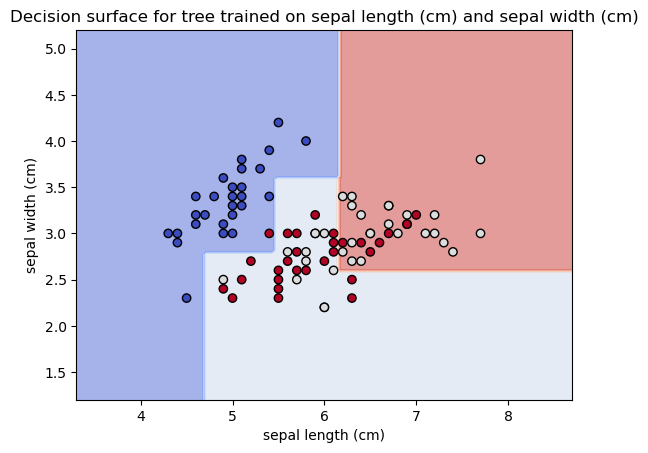

In [11]:
from sklearn import inspection
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

y_train.replace(['setosa', 'virginica','versicolor'],
                        [0, 1,2], inplace=True)


disp = DecisionBoundaryDisplay.from_estimator(clf, 
                                              X_train, 
                                              response_method="predict",
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

# Plotting the data points    
disp.ax_.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], 
                 edgecolor="k",c = y_train,
                 cmap=plt.cm.coolwarm)

plt.title(f"Decision surface for tree trained on {data.feature_names[0]} and {data.feature_names[1]}")
plt.show()

In [28]:
test_pred_decision_tree = clf.predict(test_x)

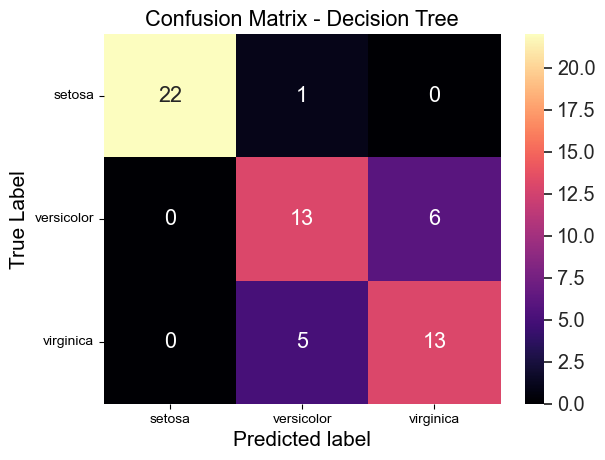

<Figure size 1000x700 with 0 Axes>

In [13]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_y,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [29]:
metrics.accuracy_score(test_y, test_pred_decision_tree)

0.8

In [30]:
#get the precision score
precision = metrics.precision_score(test_y,
                                   test_pred_decision_tree, 
                                   average=None)
#turn it into a dataframe
precision_results = pd.DataFrame(precision, index=labels)
#rename the results column
precision_results.rename(columns={0:'precision'}, inplace =True)
precision_results

,precision
setosa,1.000000
versicolor,0.684211
virginica,0.684211


In [31]:
recall = metrics.recall_score(test_y, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= labels)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
setosa,0.956522
versicolor,0.684211
virginica,0.722222


In [32]:
print(metrics.classification_report(test_y,
                                    test_pred_decision_tree))

              precision    recall  f1-score   support

      setosa       1.00      0.96      0.98        23
  versicolor       0.68      0.68      0.68        19
   virginica       0.68      0.72      0.70        18

    accuracy                           0.80        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60



In [18]:
#extract importance
importance = pd.DataFrame({'feature': X_train.columns, 
'importance' : np.round(clf.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

             feature  importance
0  sepal length (cm)       0.712
1   sepal width (cm)       0.288


In [21]:
from sklearn.model_selection import GridSearchCV

tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=tree_param, cv=5, scoring = "precision")
grid_search.fit(X_train, y_train)
grid_search.best_params_


{'criterion': 'gini', 'max_depth': 4}